# 1. Import Library

In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Dataset

In [2]:
df = pd.read_csv('data_balita.csv')
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
df.shape

(120999, 4)

# 3. Exploratory Data Analysis

## 3.1 Status Gizi (Target Variabel)

In [6]:
def create_count_plot(feature, orient = "horizontal"):
  feature_agg = feature.value_counts()
  feature_index = feature_agg.index
  feature_values = feature_agg.values
  if orient == "horizontal":
    sns.barplot(x = feature_index, y = feature_values)
    plt.show()
  elif orient == "vertical":
    sns.barplot(y = feature_index, x = feature_values)
    plt.show()

normal              0.559963
severely stunted    0.164208
tinggi              0.161654
stunted             0.114174
Name: Status Gizi, dtype: float64

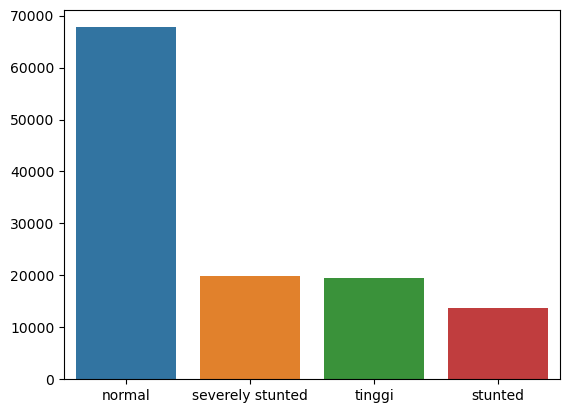

In [8]:
display(df["Status Gizi"].value_counts()/len(df))
create_count_plot(df["Status Gizi"], orient = "horizontal")

Data target variabel menunjukan persentase normal 0.55% lebih banyak dari variabel lainnya

## 3.2 Umur dan TInggi Badan

C:\Users\hudza\AppData\Local\Temp\ipykernel_15576\1523363272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Umur (bulan)"])


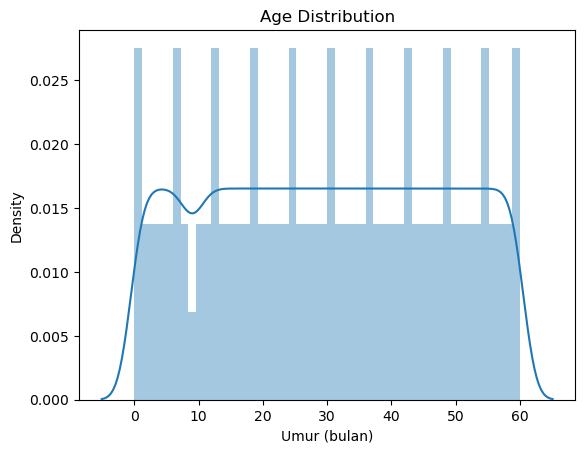

count    120999.000000
mean         30.173803
std          17.575119
min           0.000000
25%          15.000000
50%          30.000000
75%          45.000000
max          60.000000
Name: Umur (bulan), dtype: float64

In [10]:
sns.distplot(df["Umur (bulan)"])
plt.title("Age Distribution")
plt.show()
display(df["Umur (bulan)"].describe())

,Umur (bulan)
Status Gizi,
normal,32.607601
severely stunted,26.290956
stunted,32.763807
tinggi,23.858129


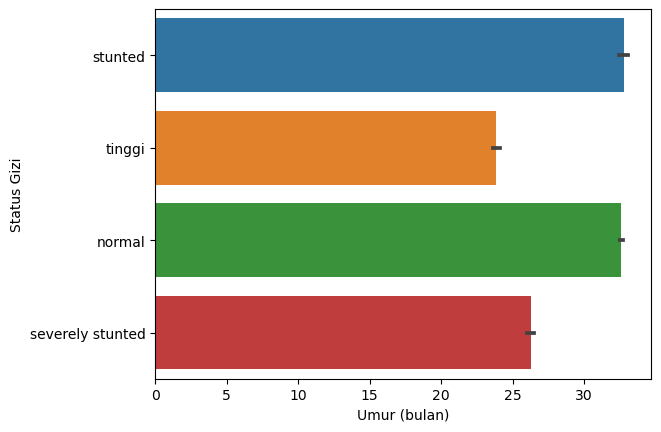

In [15]:
sns.barplot(x="Umur (bulan)", y="Status Gizi", data=df)
display(df[["Umur (bulan)","Status Gizi"]].groupby("Status Gizi").mean())

Stunting tertinggi berada di usia diatas 30 bulan

C:\Users\hudza\AppData\Local\Temp\ipykernel_15576\1364730282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tinggi Badan (cm)"])


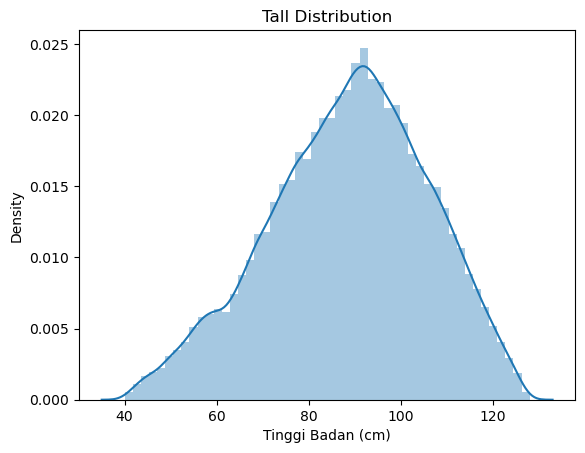

count    120999.000000
mean         88.655434
std          17.300997
min          40.010437
25%          77.000000
50%          89.800000
75%         101.200000
max         128.000000
Name: Tinggi Badan (cm), dtype: float64

In [17]:
sns.distplot(df["Tinggi Badan (cm)"])
plt.title("Tall Distribution")
plt.show()
display(df["Tinggi Badan (cm)"].describe())

rata rata tinggi badan balita terbanyak adalah 88cm

,Tinggi Badan (cm)
Status Gizi,
normal,92.702689
severely stunted,73.176224
stunted,82.208722
tinggi,94.912898


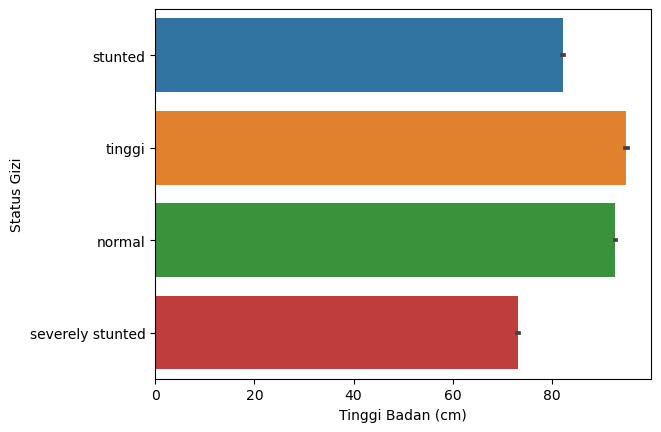

In [19]:
sns.barplot(x="Tinggi Badan (cm)", y="Status Gizi", data=df)
display(df[["Tinggi Badan (cm)","Status Gizi"]].groupby("Status Gizi").mean())

## 3.3 Gender

perempuan    0.504153
laki-laki    0.495847
Name: Jenis Kelamin, dtype: float64

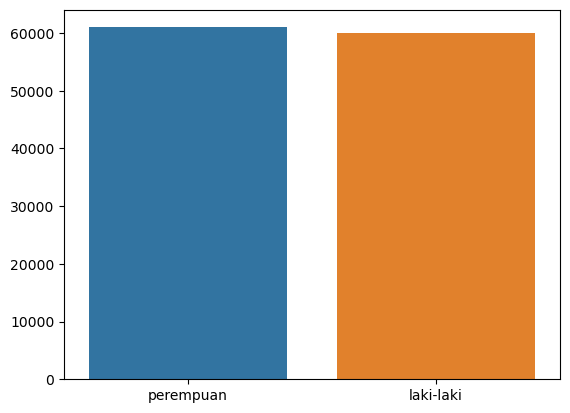

In [20]:
display(df["Jenis Kelamin"].value_counts()/len(df))
create_count_plot(df["Jenis Kelamin"], orient = "horizontal")

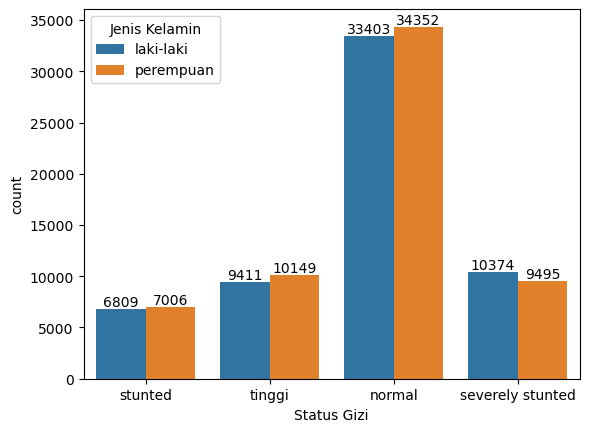

In [22]:
ax = sns.countplot(x=df["Status Gizi"],
              hue=df["Jenis Kelamin"])
for i in ax.containers:
    ax.bar_label(i,)

Laki laki dan perempuan memiliki distribusi yang sama terhadap target variabel

# 4. Data Engineering

  - Check Missing Values
  - Data Cleansing (No Missing Value)
  - Feature Engineering

## 4.1 Check Missing Value

In [23]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

## 4.2 Feature Engineering

In [24]:
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

# mengkodekan status gizi
df['Status Gizi'] = df['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0


# 5. Modelling
   - Train Test Split
   - Model Fitting
   - Cross Val Evaluation
   - Model Selection

## 5.1 Train Test Split

In [25]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# memisahkan fitur dan target
X = df.iloc[:, 1:6]
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

print(X.shape, y.shape)

(120999, 3) (120999,)


In [26]:
X.head(2)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,44.591973
1,0,0,56.705203


In [27]:
y

0         1
1         3
2         2
3         2
4         0
         ..
120994    2
120995    1
120996    2
120997    2
120998    2
Name: Status Gizi, Length: 120999, dtype: int64

In [35]:
test_size = 0.3
seed = 15032024
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=test_size,
                                                                    random_state=seed,
                                                                    stratify = y)
print("Data Train:",X_train.shape, y_train.shape)
print("Data Test:",X_test.shape, y_test.shape)

Data Train: (84699, 3) (84699,)
Data Test: (36300, 3) (36300,)


## 5.2 Model Fitting

In [36]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [37]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(X_train, y_train)
print("Run Decision Tree")
model_dt.fit(X_train, y_train)
print("Run Random Forest")
model_rf.fit(X_train, y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, y_train)

Run Logistics Regression


d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [41]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
import pandas as pd

model_list = ["model_lr", "model_dt", "model_rf", "model_gb", "model_nb"]

def evaluate_models(model_list, X_train, y_train, X_test, y_test):
    df_eval = pd.DataFrame()
    df_eval["model"] = model_list

    for model in model_list:
        open_model = eval(model)

        # Akurasi training dan testing
        result_train = open_model.score(X_train, y_train)
        result_test = open_model.score(X_test, y_test)
        df_eval.loc[df_eval["model"] == model, "acc_train"] = result_train
        df_eval.loc[df_eval["model"] == model, "acc_test"] = result_test

        # Prediksi probabilitas untuk AUC Score (jika model mendukung predict_proba)
        if hasattr(open_model, "predict_proba"):
            y_pred_proba = open_model.predict_proba(X_test)
            # Menggunakan average='macro' untuk multiclass
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            df_eval.loc[df_eval["model"] == model, "auc_score"] = auc_score
        else:
            df_eval.loc[df_eval["model"] == model, "auc_score"] = None

        # Prediksi label untuk f1_score, precision_score, dan recall_score
        y_pred = open_model.predict(X_test)

        # Nilai f1_score, precision_score, dan recall_score (menggunakan average='macro' untuk multiclass)
        f1 = f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        df_eval.loc[df_eval["model"] == model, "f1_score"] = f1
        df_eval.loc[df_eval["model"] == model, "precision_score"] = precision
        df_eval.loc[df_eval["model"] == model, "recall_score"] = recall

    return df_eval

# Panggil fungsi untuk mendapatkan DataFrame evaluasi
df_eval = evaluate_models(model_list, X_train, y_train, X_test, y_test)
print(df_eval)


      model  acc_train  acc_test  auc_score  f1_score  precision_score  \
0  model_lr   0.763114  0.763058   0.925338  0.656578         0.678004   
1  model_dt   1.000000  0.998926   0.999107  0.998565         0.998519   
2  model_rf   1.000000  0.998926   0.999998  0.998464         0.998608   
3  model_gb   0.945052  0.941129   0.994550  0.911437         0.949683   
4  model_nb   0.554280  0.554408   0.781113  0.272430         0.237818   

   recall_score  
0      0.649246  
1      0.998612  
2      0.998322  
3      0.887435  
4      0.320312  


d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.3 Run Model XGboost

In [42]:
def train_model(X,y):
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_gb.fit(X,y)
  return model_gb
model_churn = train_model(X,y)

## 5.4 Prediksi Datatest

In [43]:
from sklearn.metrics import accuracy_score

# membuat prediksi dengan data uji
y_pred = model_gb.predict(X_test)

# menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model KNN:', accuracy)

Akurasi model KNN: 0.941129476584022


In [44]:
from sklearn.model_selection import cross_val_score

print('Cross val: ', cross_val_score(model_gb, y_test.values.reshape(-1, 1), y_pred, cv = 5))
print('Accuracy : ', np.mean(cross_val_score(model_gb, y_test.values.reshape(-1, 1), y_pred)))

Cross val:  [0.93539945 0.94090909 0.93732782 0.94724518 0.94476584]
Accuracy :  0.9411294765840221


In [45]:
# Testing model
test = pd.DataFrame({'Umur (bulan)': [20], 'Jenis Kelamin': [1], 'Tinggi Badan (cm)': [86.2]})

pred = model_gb.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [2]


# 6. Model Interpretation

In [33]:
df_imp = pd.DataFrame()
df_imp["features"] = X_train.columns.tolist()
df_imp["importance"] = model_gb.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
2,Tinggi Badan (cm),0.593276
0,Umur (bulan),0.403511
1,Jenis Kelamin,0.003213
